In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

In [2]:
df = pd.read_csv('Salary_dataset.csv')

In [3]:
print(df.head())

print("\nInformações do DataFrame:")
df.info()

print("\nEstatísticas Descritivas:")
print(df.describe())

print(f"\nShape dos dados: {df.shape}")

   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes

Estatísticas Descritivas:
       Unnamed: 0  YearsExperience         Salary
count   30.000000        30.000000      30.000000
mean    14.500000         5.413333   76004.000000
std      8.803408         2.837888   27414.429785
min      0.000000         1.200000   37732.000000
25%      7.250000         3.300000   56721.750000
50%     14.500000  

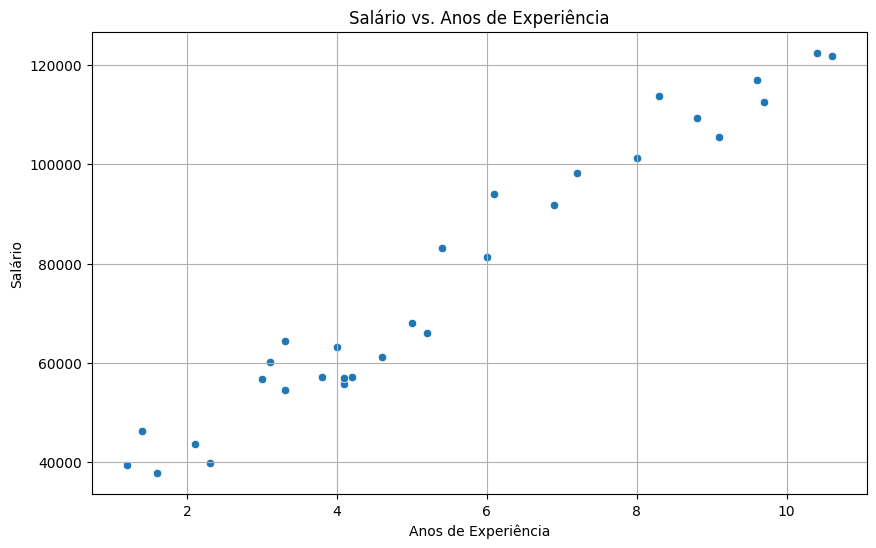

In [4]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearsExperience', y='Salary', data=df)
plt.title('Salário vs. Anos de Experiência')
plt.xlabel('Anos de Experiência')
plt.ylabel('Salário')
plt.grid(True)
plt.show()

In [5]:
# X (feature) -> 'YearsExperience'
# y (alvo) -> 'Salary'
X = df['YearsExperience'].values
y = df['Salary'].values

In [6]:
print(f"Shape de X antes do reshape: {X.shape}")

X = X.reshape(-1, 1)

print(f"Shape de X depois do reshape: {X.shape}")

Shape de X antes do reshape: (30,)
Shape de X depois do reshape: (30, 1)


In [7]:
# Usando test_size=0.2 para 20% de teste e random_state=42 para resultados reproduzíveis
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape X_train: {X_train.shape}")
print(f"Shape X_test: {X_test.shape}")

Shape X_train: (24, 1)
Shape X_test: (6, 1)


In [8]:
# 1. Criar a instância do modelo
model = LinearRegression()

# 2. Treinar o modelo com os dados de treino
model.fit(X_train, y_train)

print("Modelo treinado com sucesso!")
print(f"Coeficiente (Angular): {model.coef_[0]:.2f}")
print(f"Intercepto (Linear): {model.intercept_:.2f}")

Modelo treinado com sucesso!
Coeficiente (Angular): 9423.82
Intercepto (Linear): 24380.20


In [9]:
# Fazer previsões nos dados de treino e teste
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calcular R² (Coeficiente de Determinação)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Calcular RMSE (Root Mean Squared Error)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("--- Avaliação do Modelo ---")
print(f"\n--- Conjunto de Treino ---")
print(f"R² (Treino): {r2_train:.3f}")
print(f"RMSE (Treino): R$ {rmse_train:.2f}")

print(f"\n--- Conjunto de Teste ---")
print(f"R² (Teste): {r2_test:.3f}")
print(f"RMSE (Teste): R$ {rmse_test:.2f}")

--- Avaliação do Modelo ---

--- Conjunto de Treino ---
R² (Treino): 0.965
RMSE (Treino): R$ 5205.98

--- Conjunto de Teste ---
R² (Teste): 0.902
RMSE (Teste): R$ 7059.04


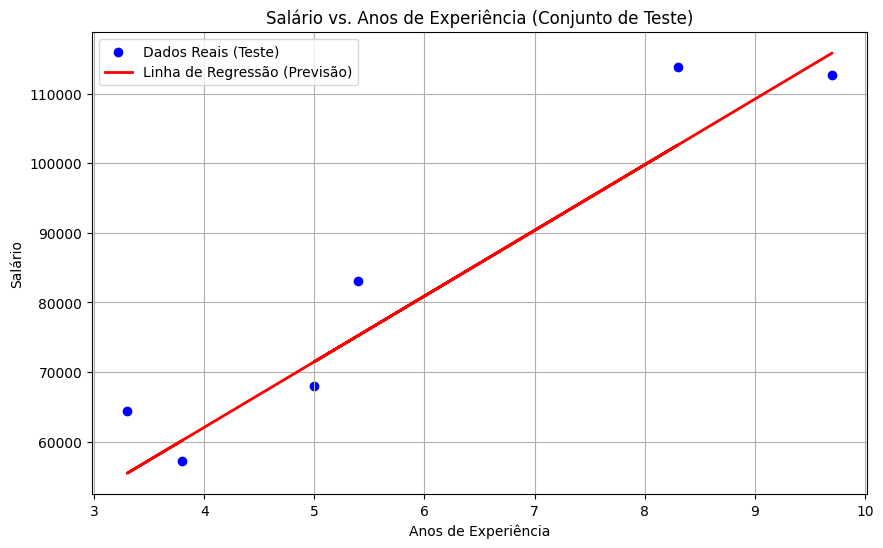

In [10]:
plt.figure(figsize=(10, 6))

# Plotar os pontos de dados reais do conjunto de TESTE
plt.scatter(X_test, y_test, color='blue', label='Dados Reais (Teste)')

# Plotar a linha de regressão (previsões do modelo para o X_test)
plt.plot(X_test, y_pred_test, color='red', linewidth=2, label='Linha de Regressão (Previsão)')

plt.title('Salário vs. Anos de Experiência (Conjunto de Teste)')
plt.xlabel('Anos de Experiência')
plt.ylabel('Salário')
plt.legend()
plt.grid(True)
plt.show()

## primeiro, importei as bibliotecas como pandas para carregar e manipular os dados, matplotlib para visualizar junto com o seaborn, dividi os dados com o split de treino e teste, e usei a regressão linear para o modelo, e coloquei junto os scores e erros para avaliar ele, e o numpy para fazer cálculos tipo a raiz quadrada do RMSE, carreguei o dataset, printei para visualizar as primeiras linhas, vi se tinha valores nulos, usei o describe para ver estatísticas descritivas dos dados e o formato dos dados com shape, como temos 30 linhas e 2 colunas, não tinha nenhum valor nulo, que é muito bom, e os anos de experiência variam de 1 a 10 anos, o salário fica variando entre 37 mil a 122 mil, para visualizar os dados usei o scatterplot porque achei o mais importante nesse caso de regressão linear simples com uma feature só, para ver se existia uma relação também linear entre anos de experiência e salário, o resultado do gráfico mostrou uma relação linear forte, ficando claro que, a medida que os anos de experiência aumentam, o salário também tende a aumentar de forma linear, confirmando que a regressão linear é perfeita para esse problema, depois separei os dados com x e y, sendo a feature x os anos de experiência e y o salário(o alvo), usei o sci-kit learn para mudar o formato do x, como ele estava em uma dimensão, transformei em duas, depois dividi os dados de treino e teste em 80 e 20, analisando os resultados pude ver que para cada um ano a mais de experiência, o salário aumenta em média quase 9500, podendo variar um pouco, e o modelo também estimou que um profissional com 0 anos de experiência começaria com um salário de quase 25 mil reais, além de descobrir que quero trabalhar nesse lugar, descobri os resultados do desempenho do modelo criado, foi possível observar que o R² do conjunto de teste foi 0.902, o que é excelente, uma taxa de 90% da variação nos salários usando só os anos de experiência, mostrou também que não tem overfitting, em conclusão, o modelo de regress]ao linear simples foi treinado e bem sucedido, o RMSE foi de R$7,059,64 no conjunto de teste, oque mostra um modelo bem robusto e preciso para prever os salários com base nos anos de experiência no dataset

## Aluno: Gabriel Ferraz Milet